 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
wr_csv = Path("whale_returns.csv")
wr_df=pd.read_csv(wr_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [3]:
# Count nulls
wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
wr_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
ar_csv = Path("algo_returns.csv")
ar_df=pd.read_csv(ar_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [6]:
# Count nulls
ar_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
ar_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp_csv = Path("sp500_history.csv")
sp_df=pd.read_csv(sp_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [9]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].astype(str)
sp_df['Close'] = sp_df['Close'].str.replace('$', '')
sp_df['Close'] = sp_df['Close'].astype(float)

In [11]:
# Calculate Daily Returns
daily_return_sp_df = sp_df.pct_change(1)
daily_return_sp_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Rename Column to Daily Returns
daily_return_sp_df.rename(columns={'Close':'Daily Returns'}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [13]:
# Concatenate all DataFrames into a single DataFrame
portfolio_returns_df = pd.concat([wr_df,ar_df,daily_return_sp_df], axis='columns', join='inner')
portfolio_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

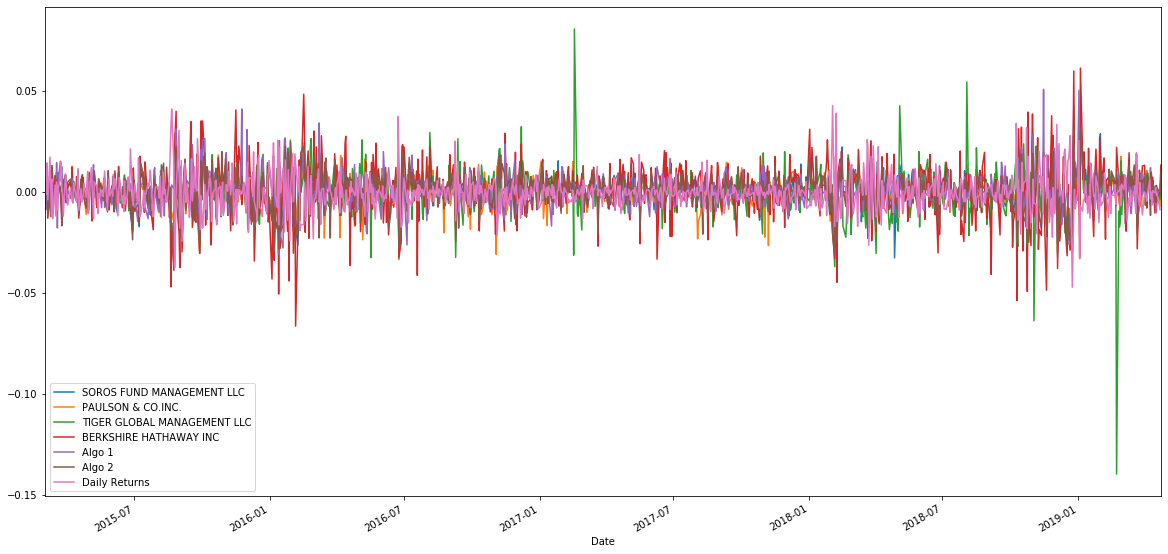

In [14]:
# Plot daily returns
portfolio_returns_df.plot(figsize=(20,10))

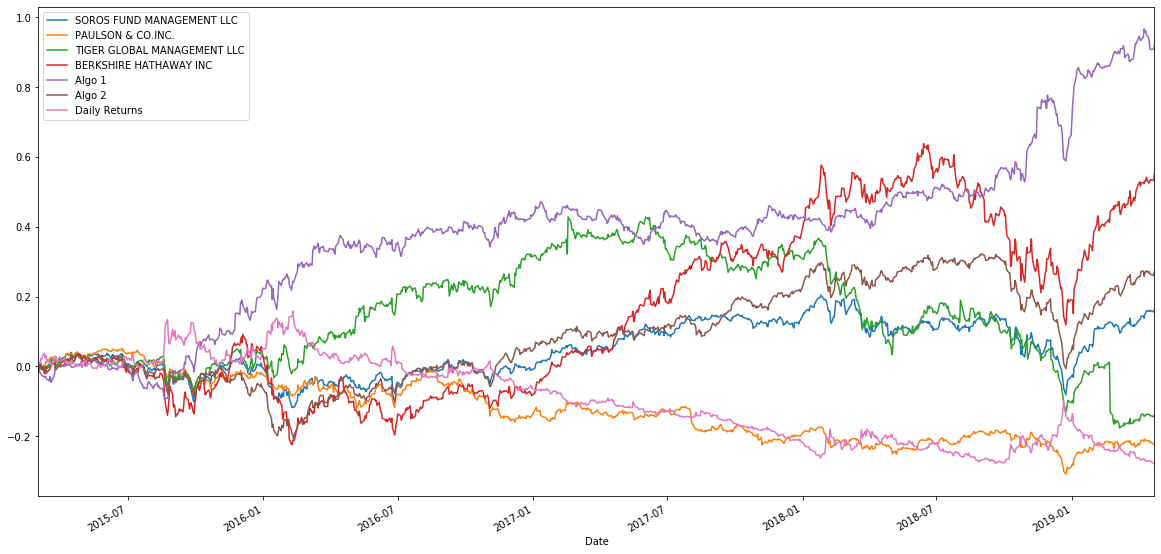

In [15]:
# Plot cumulative returns
cumulative_returns = (1 + portfolio_returns_df).cumprod()-1
cumulative_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [17]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
portfolio_returns_df.std().sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
Daily Returns                  0.008584
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007621
PAULSON & CO.INC.              0.007023
dtype: float64

**Determine which portfolios are riskier than the S&P 500**
The portfolios that are riskier than the S&P 500 include Tiger Global Management and Berkshire Hathaway.

In [18]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = portfolio_returns_df.std() * np.sqrt(252)
ann_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
Daily Returns                  0.136268
Algo 2                         0.132374
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120987
PAULSON & CO.INC.              0.111488
dtype: float64

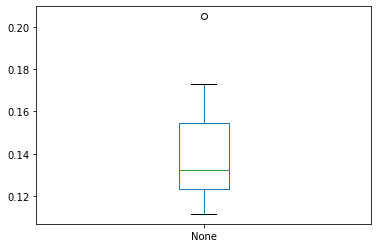

In [50]:
# Box plot to visually show risk
ann_std.plot(kind='box')

**Analysis**
Berkshire Hathaway and Tiger Global are riskier than the S&P500

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

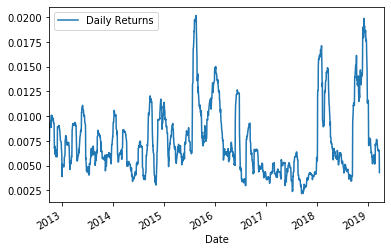

In [19]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp_df_sma_21=daily_return_sp_df.rolling(window=21).std()
sp_df_sma_21.plot()

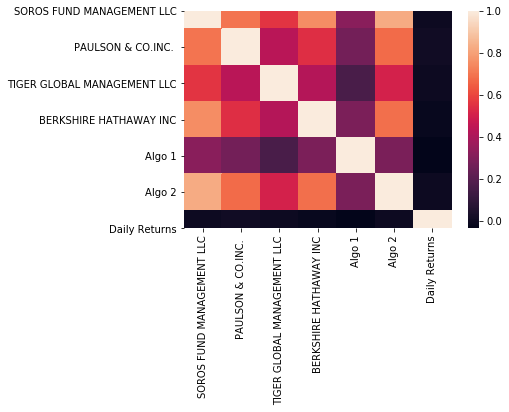

In [20]:
# Correlation
correlation=portfolio_returns_df.corr()
sns.heatmap(correlation)

In [54]:
#Berkshire beta
berkshire_covariance = portfolio_returns_df['BERKSHIRE HATHAWAY INC'].cov(portfolio_returns_df['Daily Returns'])
berkshire_variance = portfolio_returns_df['Daily Returns'].var()
berkshire_beta = berkshire_covariance / berkshire_variance
berkshire_beta

-0.020860155171347095

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [22]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [23]:
# Annualzied Sharpe Ratios
sharpe_ratios = (portfolio_returns_df.mean() * 252) / (portfolio_returns_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.360829
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.506929
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
Daily Returns                 -0.510171
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

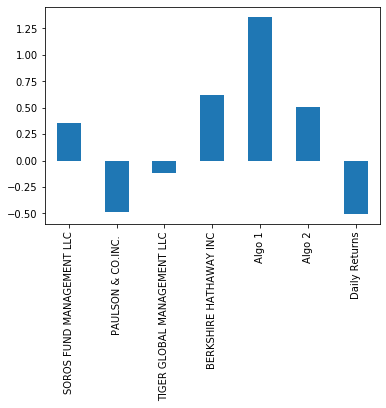

In [24]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [25]:
# Read the first stock
AMZN_csv = Path("AMZN_10.csv")
AMZN_df=pd.read_csv(AMZN_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [26]:
# Read the second stock
MSFT_csv = Path("MSFT_10.csv")
MSFT_df=pd.read_csv(MSFT_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [27]:
# Read the third stock
GLD_csv = Path("GLD_10.csv")
GLD_df=pd.read_csv(GLD_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [28]:
# Concatenate all stocks into a single DataFrame
my_portfolio_df = pd.concat([AMZN_df,MSFT_df,GLD_df], axis='columns', join='inner')
my_portfolio_df.head()

,Close,Close,Close
Date,,,
2010-04-08 16:00:00,140.96,29.92,112.65
2010-04-09 16:00:00,140.06,30.34,113.64
2010-04-12 16:00:00,141.20,30.32,113.01
2010-04-13 16:00:00,140.16,30.45,112.69
2010-04-14 16:00:00,144.28,30.82,113.03


In [29]:
#Sort Index
my_portfolio_df.sort_index()

,Close,Close,Close
Date,,,
2010-04-08 16:00:00,140.96,29.92,112.65
2010-04-09 16:00:00,140.06,30.34,113.64
2010-04-12 16:00:00,141.20,30.32,113.01
2010-04-13 16:00:00,140.16,30.45,112.69
2010-04-14 16:00:00,144.28,30.82,113.03
...,...,...,...
2020-04-01 16:00:00,1907.70,152.11,149.45
2020-04-02 16:00:00,1918.83,155.26,151.90
2020-04-03 16:00:00,1906.59,153.83,152.65


In [30]:
# Reset the columns
my_portfolio_df.columns = ["AMZN", "MSFT", "GLD"]
my_portfolio_df.head()

,AMZN,MSFT,GLD
Date,,,
2010-04-08 16:00:00,140.96,29.92,112.65
2010-04-09 16:00:00,140.06,30.34,113.64
2010-04-12 16:00:00,141.20,30.32,113.01
2010-04-13 16:00:00,140.16,30.45,112.69
2010-04-14 16:00:00,144.28,30.82,113.03


In [31]:
# Drop Nulls
my_portfolio_df.isnull().sum()

AMZN    0
MSFT    0
GLD     0
dtype: int64

In [32]:
#Put in terms of daily returns
my_daily_returns = my_portfolio_df.pct_change()
my_daily_returns

,AMZN,MSFT,GLD
Date,,,
2010-04-08 16:00:00,NaN,NaN,NaN
2010-04-09 16:00:00,-0.006385,0.014037,0.008788
2010-04-12 16:00:00,0.008139,-0.000659,-0.005544
2010-04-13 16:00:00,-0.007365,0.004288,-0.002832
2010-04-14 16:00:00,0.029395,0.012151,0.003017
...,...,...,...
2020-04-01 16:00:00,-0.021552,-0.035508,0.009456
2020-04-02 16:00:00,0.005834,0.020709,0.016393
2020-04-03 16:00:00,-0.006379,-0.009210,0.004937


In [33]:
#Fix Date
my_daily_returns_fixed = my_daily_returns.copy()
my_daily_returns_fixed.index = my_daily_returns.index.to_series().dt.date
my_daily_returns_fixed.sample(10)

,AMZN,MSFT,GLD
Date,,,
2013-05-15,-0.006596,0.009544,-0.023075
2018-07-25,0.018789,0.029445,0.005515
2010-11-15,-0.040922,-0.002665,-0.009500
2017-11-06,0.008150,0.003922,0.008539
2013-08-20,0.005323,0.007327,0.003333
2020-03-20,-0.018523,-0.037559,0.014996
2018-07-10,0.002329,0.002651,-0.001846
2016-08-08,0.000757,0.001725,-0.000862
2014-08-01,-0.018946,-0.006951,0.008023


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_portfolio_returns = my_daily_returns_fixed.dot(weights)
my_portfolio_returns

Date
2010-04-08         NaN
2010-04-09    0.005480
2010-04-12    0.000645
2010-04-13   -0.001970
2010-04-14    0.014854
                ...   
2020-04-01   -0.015868
2020-04-02    0.014312
2020-04-03   -0.003551
2020-04-06    0.049936
2020-04-07   -0.003037
Length: 2517, dtype: float64

In [35]:
#Creating my portfolio column
my_daily_returns_fixed['My Portfolio'] = my_portfolio_returns
my_daily_returns_fixed

,AMZN,MSFT,GLD,My Portfolio
Date,,,,
2010-04-08,NaN,NaN,NaN,NaN
2010-04-09,-0.006385,0.014037,0.008788,0.005480
2010-04-12,0.008139,-0.000659,-0.005544,0.000645
2010-04-13,-0.007365,0.004288,-0.002832,-0.001970
2010-04-14,0.029395,0.012151,0.003017,0.014854
...,...,...,...,...
2020-04-01,-0.021552,-0.035508,0.009456,-0.015868
2020-04-02,0.005834,0.020709,0.016393,0.014312
2020-04-03,-0.006379,-0.009210,0.004937,-0.003551


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
#Concatinate all data frames
all_df = pd.concat([portfolio_returns_df,my_daily_returns_fixed], axis='columns', join='inner')
all_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,AMZN,MSFT,GLD,My Portfolio
Date,,,,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559,0.014468,0.000684,-0.004132,0.003673
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.002723,-0.013674,-0.001815,-0.006071
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.004914,-0.005083,-0.003118,-0.004372
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.013352,0.001161,-0.000956,0.004519
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.019957,-0.017397,-0.027304,-0.021553


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,AMZN,MSFT,GLD,My Portfolio
Date,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.002723,-0.013674,-0.001815,-0.006071
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.004914,-0.005083,-0.003118,-0.004372
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.013352,0.001161,-0.000956,0.004519
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.019957,-0.017397,-0.027304,-0.021553
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.004025,0.011568,0.000983,0.002842
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000982,0.000827,-0.001888,-0.000026
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.009849,-0.002313,-0.008964,-0.000476
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.000955,0.008280,-0.001909,0.002442


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
#all_df.std().sort_values(ascending=False)
all_df_annualized = my_portfolio_returns.std() * np.sqrt(252)
all_df_annualized

0.17127421532616083

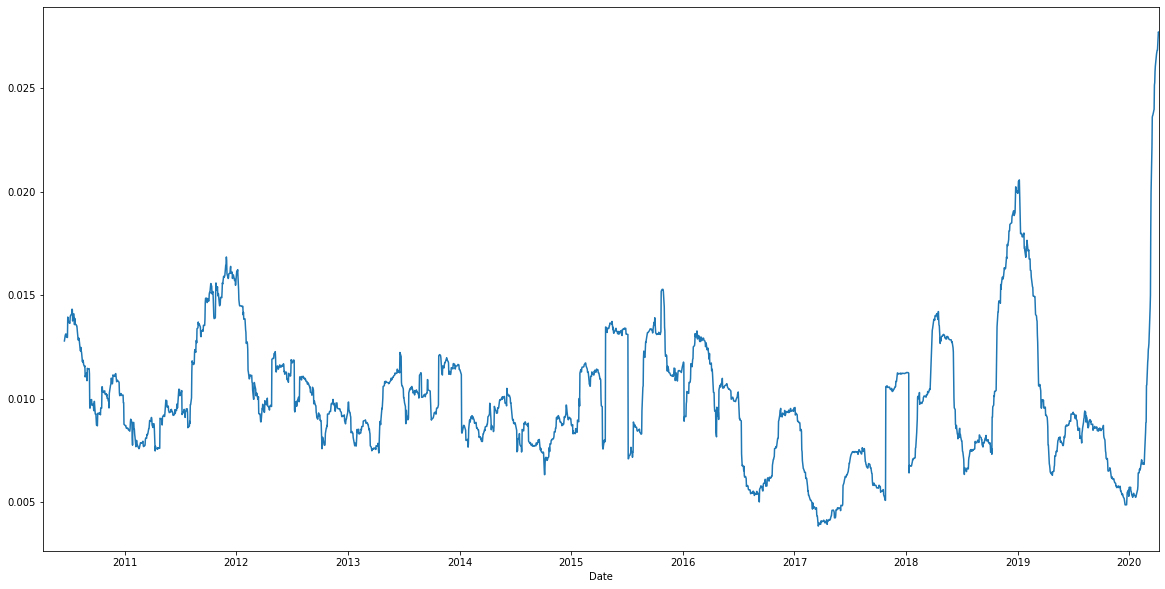

In [39]:
# Rolling
all_df_annualized_sma_50=my_portfolio_returns.rolling(window=50).std()
all_df_annualized_sma_50.plot(figsize=(20,10))

In [41]:
# Beta
my_portfolio_covariance = all_df['My Portfolio'].cov(all_df['Daily Returns'])
my_portfolio_variance = all_df['Daily Returns'].var()
my_portfolio_beta = my_portfolio_covariance / my_portfolio_variance
my_portfolio_beta

0.029083895629074635

In [45]:
# Annualzied Sharpe Ratios
#my_portfolio_sharpe_ratios = (my_daily_returns_fixed.mean() * 252) / (my_daily_returns_fixed.std() * np.sqrt(252))
#my_portfolio_sharpe_ratios.sort_values(ascending=False)
my_portfolio_sharpe_ratios = (all_df.mean() * 252) / (all_df.std() * np.sqrt(252))
my_portfolio_sharpe_ratios.sort_values(ascending=False)

My Portfolio                   1.497420
AMZN                           1.455783
Algo 1                         1.362608
MSFT                           1.196029
BERKSHIRE HATHAWAY INC         0.621655
Algo 2                         0.501139
SOROS FUND MANAGEMENT LLC      0.357300
GLD                            0.127177
TIGER GLOBAL MANAGEMENT LLC   -0.121767
PAULSON & CO.INC.             -0.483570
Daily Returns                 -0.511099
dtype: float64

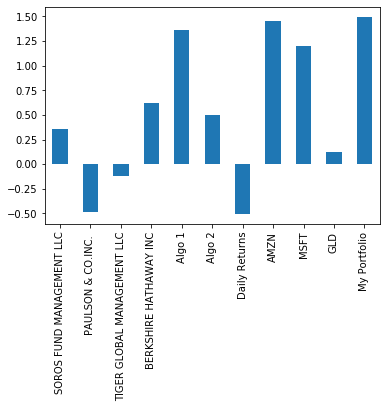

In [46]:
# Visualize the sharpe ratios as a bar plot
my_portfolio_sharpe_ratios.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

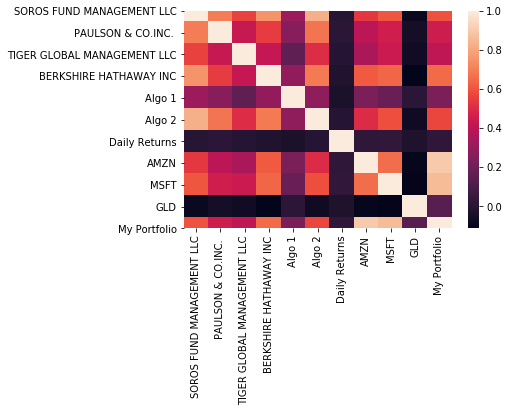

In [44]:
# Correlation analysis
all_df_correlation=all_df.corr()
sns.heatmap(all_df_correlation)

**Analysis**

#Correlation:
-GLD is not strongly correlated to any of the portfolios
-My Portfolio is correlated the most to Amazon, followed by Microsoft then Gold
-The most correlated portfolios include Berkshire and Soros as well as Algo 2 and Soros
#Comparison:
-My Portfolio has the highest Sharpe ratio, ergo the best return to risk ratio out of all the other portfolios